# **GIS × Python Tutorial Session11.1 ~ RasterDataことはじめ ~**
---
この記事は「GIS × Python Tutorial」の関連記事です。

<br><br><br>

## はじめに
---
今回からはRasterデータの取り扱いについての記事を書いていきます。


 - 使用するRasterデータの作成
 - Rasterデータの読み込み

    - Input raster from GDAL.
    
    - Input raster from rasterio.
    
 - Rasterデータの出力

    - Output raster from GDAL.

    - Output raster from rasterio.


## GDALとrasterio

In [46]:
from rasterio import Affine

import japanize_matplotlib
import numpy as np
from matplotlib import pyplot as plt
from osgeo import gdal
import pyproj
import rasterio
import rasterio.plot
japanize_matplotlib.japanize()


IN_EPSG = 'EPSG:6678'
proj_crs = pyproj.CRS(IN_EPSG)
IN_SRS = proj_crs.to_wkt(pretty=True)

## Rasterデータの作成
---

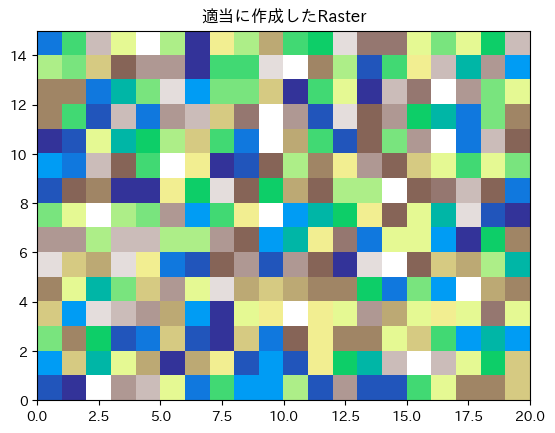

In [2]:
cols = 20
rows = 15
image = np.array([np.random.randint(0, 20, cols) for i in range(rows)])

extent = (0, cols, 0, rows)
fig, ax = plt.subplots()
ax.set_title('適当に作成したRaster')
ax.imshow(image, extent=extent, cmap='terrain');

## GDALを使用したRasterの出力
---

In [3]:
# ファイルパス
RASTER_FILE_GDAL = r'../datasets/session11/RASTER_GDAL.tif'

# メタデータの準備
meta_data = dict(
    xsize=cols,
    ysize=rows,
    bands=1,
    eType=gdal.GDT_Byte
)

# 書き込み準備
driver_gtiff = gdal.GetDriverByName('GTiff')
gdal_dst = driver_gtiff.Create(RASTER_FILE_GDAL, **meta_data)

# 空間参照系の定義
gdal_dst.SetProjection(IN_SRS)

# 座標やセルサイズの定義
# [X_Min, セルの幅, 行回転, Y_Max, 列回転, セルの高さ]
transform = [0, 1, 0, rows, 0, -1]
gdal_dst.SetGeoTransform(transform)

# Rasterの書き込み
gdal_dst.GetRasterBand(1).WriteArray(image)
gdal_dst.GetRasterBand(1).SetNoDataValue(-9999)
gdal_dst.FlushCache()
gdal_dst.Close()

d:\jlab\envs\lidar\lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


0

## GDALを使用したRasterの読み込み
---

In [4]:
gdal_dst = gdal.Open(RASTER_FILE_GDAL)
gdal_ary = gdal_dst.ReadAsArray(0)


print(f"""< GDAL >
Projection: {gdal_dst.GetProjection()}
Transform: {gdal_dst.GetGeoTransform()}
Bands: {gdal_dst.RasterCount}
Array shape: {gdal_ary.shape}
""")

< GDAL >
Projection: PROJCS["JGD2011 / Japan Plane Rectangular CS X",GEOGCS["JGD2011",DATUM["Japanese_Geodetic_Datum_2011",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1128"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","6668"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",40],PARAMETER["central_meridian",140.833333333333],PARAMETER["scale_factor",0.9999],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Northing",NORTH],AXIS["Easting",EAST],AUTHORITY["EPSG","6678"]]
Transform: (0.0, 1.0, 0.0, 15.0, 0.0, -1.0)
Bands: 1
Array shape: (15, 20)



## rasterioを使用したRasterの出力と読み込み
---

In [5]:
# ファイルパス
RASTER_FILE_RIO = r'../datasets/session11/RASTER_RIO.tif'

# メタデータの準備
meta_data = dict(
    driver='GTiff',
    dtype='uint8',
    count=1,
    height=rows,
    width=cols,
    crs=IN_SRS,
    transform=Affine(1, 0, 0, 0, -1, rows)
)

# Rasterの書き込み
with rasterio.open(RASTER_FILE_RIO, mode='w', **meta_data) as rio_dst:
    rio_dst.write(image, 1)


## rasterioを使用したRasterの読み込み
---

In [6]:
rio_dst = rasterio.open(RASTER_FILE_RIO)
rio_ary = rio_dst.read(1)

print(f"""< rasterio >
Projection: {rio_dst.read_crs().to_wkt()}
Transform: 
{rio_dst.transform}
Bands: {rio_dst.indexes}
Array shape: {rio_ary.shape}
""")


< rasterio >
Projection: PROJCS["JGD2011 / Japan Plane Rectangular CS X",GEOGCS["JGD2011",DATUM["Japanese_Geodetic_Datum_2011",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1128"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","6668"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",40],PARAMETER["central_meridian",140.833333333333],PARAMETER["scale_factor",0.9999],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Northing",NORTH],AXIS["Easting",EAST],AUTHORITY["EPSG","6678"]]
Transform: 
| 1.00, 0.00, 0.00|
| 0.00,-1.00, 15.00|
| 0.00, 0.00, 1.00|
Bands: (1,)
Array shape: (15, 20)

